In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from matplotlib import dates
from matplotlib.colors import LogNorm
from sunpy.time import parse_time
import datetime

In [3]:
all_data = pd.read_csv('all_ar_2010-2020.csv')
all_data.keys()

Index(['ar_noaanum', 'event_starttime', 'event_endtime', 'hpc_x', 'hpc_y',
       'hgs_x', 'hgs_y', 'hgc_x', 'hgc_y', 'frm_humanflag', 'frm_name',
       'frm_daterun', 'ar_mtwilsoncls', 'ar_mcintoshcls', 'SOL_standard',
       'ar_numspots', 'area_atdiskcenter', 'area_unit'],
      dtype='object')

In [4]:
tt = pd.to_datetime(all_data['event_starttime'])
times = [(t - tt[0]).total_seconds() for t in tt]
all_data['times'] = times

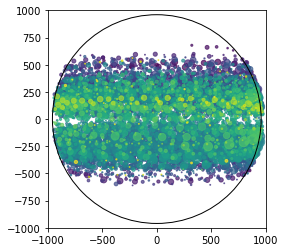

In [5]:
circle1 = plt.Circle((0, 0), 960, color='k', fill=False)
plt.scatter(all_data['hpc_x'], all_data['hpc_y'], s=10*all_data['area_atdiskcenter']/all_data['area_atdiskcenter'].mean(),
            c=times, alpha=0.7)
plt.xlim(-1000, 1000)
plt.ylim(-1000, 1000)
ax = plt.gca()
ax.add_artist(circle1)
plt.gca().set_aspect('equal', adjustable='box')

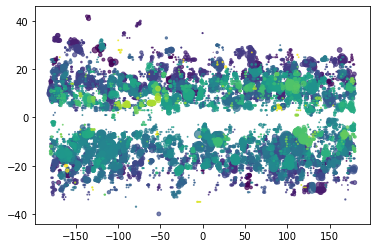

In [6]:
plt.scatter(all_data['hgc_x'], all_data['hgc_y'], 
            s=10*all_data['area_atdiskcenter']/all_data['area_atdiskcenter'].mean(), 
            c=times, 
            alpha=0.7)


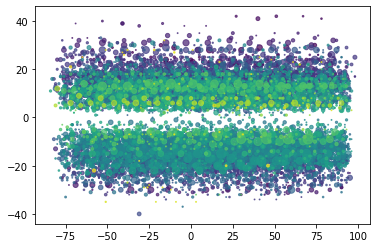

In [7]:
plt.scatter(all_data['hgs_x'], all_data['hgs_y'], 
            s=10*all_data['area_atdiskcenter']/all_data['area_atdiskcenter'].mean(), 
            c=times, alpha=0.7)


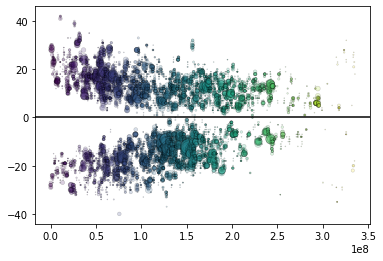

In [8]:
plt.scatter(times, all_data['hgc_y'], 
            alpha=0.2, c=times, 
            s=10*all_data['area_atdiskcenter']/all_data['area_atdiskcenter'].mean(),
            #s=100*all_data['ar_numspots']/all_data['ar_numspots'].mean(),
            cmap='viridis', edgecolor='k', lw=0.5)
plt.axhline(0, color='k')

Text(0.5, 0, 'No. sunspots')

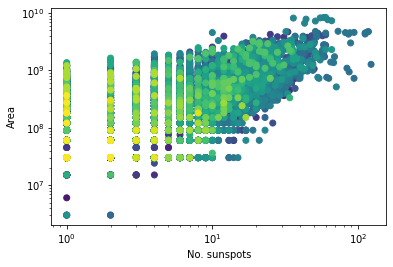

In [9]:
plt.scatter(all_data['ar_numspots'], all_data['area_atdiskcenter'], c=all_data['times'])
plt.yscale('log')
plt.xscale('log')
plt.ylabel('Area')
plt.xlabel('No. sunspots')

# Plot as function of time

In [10]:
tstart = parse_time(all_data['event_starttime'].min()).datetime
tfinal = parse_time(all_data['event_endtime'].max()).datetime
time_over = [tstart.strftime('%Y-%m-%dT%H:%M:%S')]
t0 = tstart
while t0 < tfinal:
    t0 = t0 + datetime.timedelta(days=1)
    time_over.append(t0.strftime('%Y-%m-%dT%H:%M:%S'))

In [11]:
def plot_for_date(i, savedir='/Users/lahayes/space_weather_stuff/SolarStatsStuff/ar_analysis/plots/'):
    """
    datey should be str in format "YYYY-mm-ddTHH:MM:SS"
    """
    if i < 10:
        data_for_past = all_data[all_data['event_starttime'].isin(time_over[0:i])]
    else:
        data_for_past = all_data[all_data['event_starttime'].isin(time_over[i-10:i])]
        
        
    data_for_day = all_data[all_data['event_starttime'].isin([time_over[i]])]
    
    fig, ax = plt.subplots(figsize=(5,5))
    circle1 = plt.Circle((0, 0), 960, color='k', fill=False)
    if len(data_for_day) > 0:
        ax.scatter(data_for_day['hpc_x'], data_for_day['hpc_y'], 
                   s=10*data_for_day['area_atdiskcenter']/all_data['area_atdiskcenter'].mean(), 
                   alpha=0.7, color='k', marker='x')
        
    if len(data_for_past)>0:
        ax.scatter(data_for_past['hpc_x'], data_for_past['hpc_y'], 
                   s=10*data_for_past['area_atdiskcenter']/all_data['area_atdiskcenter'].mean(), 
                   c=data_for_past['times'],
                   cmap='Reds',
                   alpha=0.7)        
    ax.set_xlim(-1000, 1000)
    ax.set_ylim(-1000, 1000)

    
    ax.set_xlabel('X arcsec')
    ax.set_ylabel('Y arscec')
    ax.set_title(time_over[i])
    ax.add_artist(circle1)
    ax.set_aspect('equal', adjustable='box')
    plt.tight_layout()
    plt.savefig(savedir + 'test_{:04d}.png'.format(i), dpi=200)
    plt.close()


In [12]:
plot_for_date(1200)

In [13]:
for i in range(0, len(time_over)):
    plot_for_date(i)
    print(i, 'out of ', len(time_over))ç

SyntaxError: invalid syntax (<ipython-input-13-8e152fd2c69f>, line 3)

In [ ]:
import subprocess

subprocess.call(['ffmpeg','-r', '10' ,'-f', 'image2', '-s', 
                '1920x1080', '-i', '/Users/lahayes/space_weather_stuff/SolarStatsStuff/ar_analysis/plots/test_%04d.png', 
                '-vcodec', 'libx264', '-crf', '25',  '-pix_fmt', 'yuv420p', 'test_mov.mp4'])

In [ ]:
plt.scatter(times, all_data['hpc_y'], alpha=0.5)

In [ ]:
plt.scatter(times, all_data['hgc_y'])

In [ ]:
plt.scatter(all_data['hgc_x'], all_data['hgc_y'], marker='x')

In [ ]:
plot_for_date(10, datey='2014-10-27T00:00:00')

In [ ]:
all_data['area_a']

In [ ]:
151000000*np.tan(1)

In [ ]:
np.tan(0.000277778)*151000000

In [ ]:
obs_distance=150000000*u.km - 695700*u.km

test = 1*u.arcsec
obs_distance

In [ ]:
test.to(u.km, equivalencies=radian_length)

In [158]:
def test(x, **kwargs):
    print(x)
    aa = kwargs.get('test', 1)
    print(aa)

In [160]:
test(10, test=2)

10
2


In [148]:
all_data[all_data['event_starttime'] == '2014-10-24T00:00:00']

,ar_noaanum,event_starttime,event_endtime,hpc_x,hpc_y,hgs_x,hgs_y,hgc_x,hgc_y,frm_humanflag,frm_name,frm_daterun,ar_mtwilsoncls,ar_mcintoshcls,SOL_standard,ar_numspots,area_atdiskcenter,area_unit
8260,12194,2014-10-24T00:00:00,2014-10-24T23:59:59,-501.5466,-272.57100,-32,-12,-150.7133,-12,True,NOAA SWPC Observer,2014-10-24T02:35:42,BETA-GAMMA-DELTA,CSO,SOL2014-10-24T00:00:00L210C102,2,2.130573e+08,km2
8261,12193,2014-10-24T00:00:00,2014-10-24T23:59:59,680.1360,39.49668,45,6,-73.7133,6,True,NOAA SWPC Observer,2014-10-24T02:35:41,BETA-GAMMA-DELTA,DAO,SOL2014-10-24T00:00:00L287C084,8,3.043676e+08,km2
8262,12192,2014-10-24T00:00:00,2014-10-24T23:59:59,98.1984,-317.33460,6,-14,-112.7133,-14,True,NOAA SWPC Observer,2014-10-24T02:35:40,BETA-GAMMA-DELTA,FKC,SOL2014-10-24T00:00:00L248C104,58,8.339671e+09,km2
8263,12195,2014-10-24T00:00:00,2014-10-24T23:59:59,-822.1020,72.84420,-59,7,-177.7133,7,True,NOAA SWPC Observer,2014-10-24T02:35:43,BETA-GAMMA-DELTA,DSO,SOL2014-10-24T00:00:00L183C083,7,2.130573e+08,km2
8264,12187,2014-10-24T00:00:00,2014-10-24T23:59:59,940.9740,-163.69020,81,-9,-37.7133,-9,True,NOAA SWPC Observer,2014-10-24T02:35:37,ALPHAGAMMA-DELTA,HSX,SOL2014-10-24T00:00:00L323C099,1,3.348043e+08,km2


In [146]:
all_data['event_starttime']

0        2010-01-01T00:00:00
1        2010-01-02T00:00:00
2        2010-01-03T00:00:00
3        2010-01-04T00:00:00
4        2010-01-05T00:00:00
                ...         
11896    2020-08-04T00:00:00
11897    2020-08-04T00:00:00
11898    2020-08-11T00:00:00
11899    2020-08-14T00:00:00
11900    2020-08-19T00:00:00
Name: event_starttime, Length: 11901, dtype: object

In [152]:
from astropy.coordinates import SkyCoord
from astropy import units as u
from sunpy.coordinates import frames
c = SkyCoord(-100*u.arcsec, 500*u.arcsec, frame='helioprojective', observer='earth')


In [155]:
c

<SkyCoord (Helioprojective: obstime=None, rsun=695700.0 km, observer=earth): (Tx, Ty) in arcsec
    (-100., 500.)>